# Jupyter Notebook: Parsing CSV and Visualizing Data

In this notebook, we will load a CSV file, convert it to a pandas DataFrame, and then create visualizations using seaborn.

In [8]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [9]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import seaborn as sns  # for visualization

## Step 1: Load CSV File and Parse Data

In [10]:
# Load the CSV file into a pandas DataFrame
file_path = 'APCD-Pueblo-RH.csv'  # Update with actual path to the file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
df.head()

,date,min,max,median,q1,q3,stdev,count
0,2022-05-28T00:00:00.000Z,4,47,30.5,7.0,41.0,15.916,130
1,2022-05-29T00:00:00.000Z,4,43,18.0,13.0,29.0,10.521,176
2,2022-05-30T00:00:00.000Z,7,41,17.0,10.0,28.0,10.013,139
3,2022-05-31T00:00:00.000Z,12,39,22.0,18.0,27.0,6.433,143
4,2022-06-01T00:00:00.000Z,21,76,55.0,46.0,70.5,13.599,205


## Step 2: Locate the Date, Min, Max, and Median Data

In [11]:
# Select relevant columns: date, min, max, median
date_min_max_median_df = df[['date', 'min', 'max', 'median']]

# Display the first few rows of the selected data
date_min_max_median_df.head(10)

,date,min,max,median
0,2022-05-28T00:00:00.000Z,4,47,30.5
1,2022-05-29T00:00:00.000Z,4,43,18.0
2,2022-05-30T00:00:00.000Z,7,41,17.0
3,2022-05-31T00:00:00.000Z,12,39,22.0
4,2022-06-01T00:00:00.000Z,21,76,55.0
5,2022-06-02T00:00:00.000Z,23,69,34.0
6,2022-06-03T00:00:00.000Z,24,72,41.0
7,2022-06-04T00:00:00.000Z,5,69,34.5
8,2022-06-05T00:00:00.000Z,5,54,26.0
9,2022-06-06T00:00:00.000Z,11,52,25.0


## Step 3: Calculate Summary Statistics

In [12]:
# Calculate summary statistics for min, max, and median columns
summary_stats = date_min_max_median_df[['min', 'max', 'median']].describe()

# Display the summary statistics
summary_stats

,min,max,median
count,629.000000,629.000000,629.000000
mean,14.055644,57.732909,35.045310
std,8.540747,13.324175,12.375202
min,1.000000,19.000000,6.500000
25%,8.000000,49.000000,25.500000
50%,12.000000,58.000000,34.000000
75%,18.000000,67.000000,43.000000
max,58.000000,100.000000,79.000000


## Step 4: Visualize the Data with Seaborn

<ipython-input-13-0658d51fe49c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])


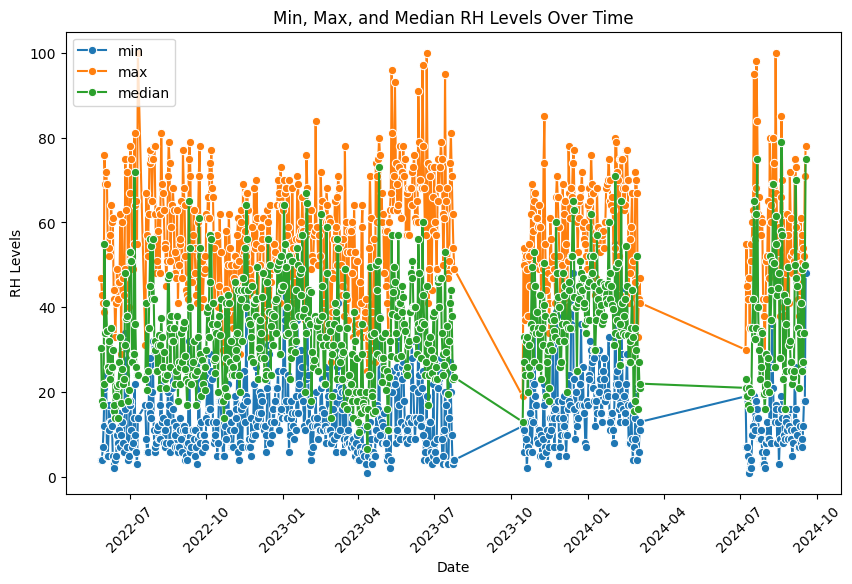

In [13]:
# Convert the Date column to datetime format
date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])

# Plot the Min, Max, and Median values over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='min', data=date_min_max_median_df, marker='o', label='min')
sns.lineplot(x='date', y='max', data=date_min_max_median_df, marker='o', label='max')
sns.lineplot(x='date', y='median', data=date_min_max_median_df, marker='o', label='median')
plt.title('Min, Max, and Median RH Levels Over Time')
plt.xlabel('Date')
plt.ylabel('RH Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

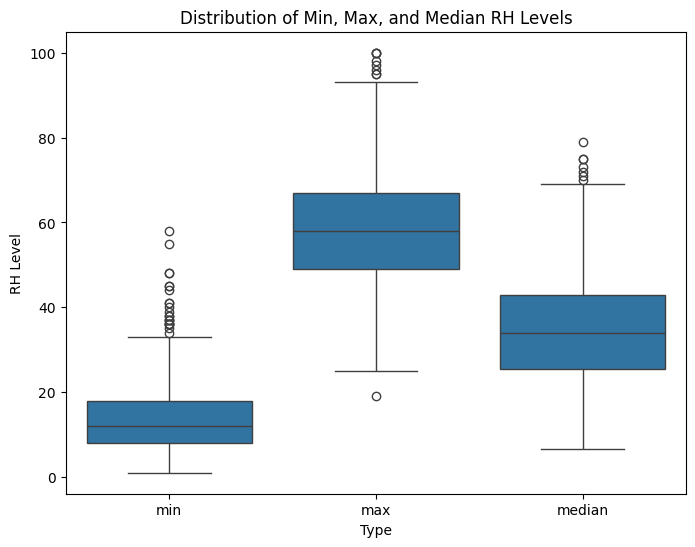

In [14]:
# Melt the data for easier plotting with seaborn
melted_df = date_min_max_median_df.melt(id_vars='date', value_vars=['min', 'max', 'median'], var_name='Type', value_name='RH Level')

# Create a box plot for Min, Max, and Median values
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='RH Level', data=melted_df)
plt.title('Distribution of Min, Max, and Median RH Levels')
plt.xlabel('Type')
plt.ylabel('RH Level')
plt.show()